In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import scipy as sp

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#표 한글, 음수표현 처리
import matplotlib
import matplotlib.font_manager as fm
font_location = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
matplotlib.rc('font',family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
# vscode) hide panel : ctrl + J

In [4]:
BBC = pd.read_csv('../result_beauty_brand_category_0625_.csv')
BBP = pd.read_csv('../result_beauty_brand_product_name_0625_.csv')
BP = pd.read_csv('../result_beauty_product_name_0625_.csv')

# Beauty Youtube 데이터 분석
* 분포적 특성 검증 (커널밀도 추정, 정규분포, 시그마 법칙)
* 시계열적 특성 분석 (이동평균선(10일의 이격도))

---
---
# Beauty Brand Category
'브랜드명'과'품목'으로 구성된 Dataframe

In [5]:
BBC.head()

,Unnamed: 0,코스알엑스 토너_0,코스알엑스 토너_1,더랩 바이 블랑두 패드_0,더랩 바이 블랑두 패드_1,프레쥬 토너_0,프레쥬 토너_1,스팀베이스 패드_0,스팀베이스 패드_1,더모테라피 토너_0,...,페리페라 팔레트_0,페리페라 팔레트_1,아임미미 큐브_0,아임미미 큐브_1,16BRAND 매거진_0,16BRAND 매거진_1,라카 팔레트_0,라카 팔레트_1,NYX 내추럴룩키트_0,NYX 내추럴룩키트_1
0,0,11.34020,46.05263,3.44827,76.76056,40.81632,11.57894,0.0,0.0,1.29589,...,6.38297,8.82978,94.11764,0.00000,0.0,0.0,50.84745,12.82051,0.0,0.0
1,1,15.46391,47.36842,2.15517,76.76056,0.00000,22.63157,0.0,0.0,0.00000,...,5.31914,7.44680,100.00000,0.00000,0.0,0.0,40.67796,25.64102,0.0,0.0
2,2,55.67010,36.84210,0.00000,100.00000,0.00000,15.26315,0.0,0.0,1.07991,...,6.17021,6.06382,35.29411,0.00000,0.0,0.0,57.62711,11.53846,0.0,0.0
3,3,23.71134,31.57894,0.00000,95.07042,91.83673,9.47368,0.0,0.0,0.64794,...,5.31914,5.95744,35.29411,9.67741,0.0,0.0,38.98305,15.38461,0.0,0.0
4,4,10.30927,38.15789,0.00000,64.08450,12.24489,19.47368,0.0,0.0,0.75593,...,7.34042,6.70212,52.94117,8.06451,0.0,0.0,47.45762,14.10256,0.0,0.0


In [6]:
BBC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Columns: 2797 entries, Unnamed: 0 to NYX 내추럴룩키트_1
dtypes: float64(2796), int64(1)
memory usage: 1.3 MB


In [7]:
BBC.iloc[61]

Unnamed: 0            61.0
코스알엑스 토너_0          7007.0
코스알엑스 토너_1          2512.0
더랩 바이 블랑두 패드_0      3511.0
더랩 바이 블랑두 패드_1      9674.0
                    ...   
16BRAND 매거진_1       5149.0
라카 팔레트_0          165583.0
라카 팔레트_1           96218.0
NYX 내추럴룩키트_0        4116.0
NYX 내추럴룩키트_1        5089.0
Name: 61, Length: 2797, dtype: float64

In [8]:
sum(BBC.isnull().sum())

0

---
### 분석을 위한 데이터 준비

In [9]:
# 해당 단위에서 사용되지 않는 조회수row(62번) 잠시 제거

BBC = BBC[:61]
BBC.tail(2)

,Unnamed: 0,코스알엑스 토너_0,코스알엑스 토너_1,더랩 바이 블랑두 패드_0,더랩 바이 블랑두 패드_1,프레쥬 토너_0,프레쥬 토너_1,스팀베이스 패드_0,스팀베이스 패드_1,더모테라피 토너_0,...,페리페라 팔레트_0,페리페라 팔레트_1,아임미미 큐브_0,아임미미 큐브_1,16BRAND 매거진_0,16BRAND 매거진_1,라카 팔레트_0,라카 팔레트_1,NYX 내추럴룩키트_0,NYX 내추럴룩키트_1
59,59,100.00000,51.31578,50.86206,54.92957,10.20408,16.84210,0.0,0.0,14.79481,...,6.48936,4.25531,0.0,0.00000,0.0,0.0,32.20338,37.17948,0.0,0.0
60,60,39.17525,39.47368,46.55172,41.54929,20.40816,8.42105,0.0,0.0,14.68682,...,7.23404,4.89361,0.0,9.67741,0.0,0.0,45.76271,16.66666,0.0,0.0


In [10]:
# row별(2798개) 평균 컬럼 추가

Row_mean = []
for i in range(0,len(BBC.index)):
    Row_mean.append(BBC.iloc[i].mean())
Row_mean = pd.DataFrame(Row_mean)
BBC['Row_mean'] = Row_mean

BBC.columns


Index(['Unnamed: 0', '코스알엑스 토너_0', '코스알엑스 토너_1', '더랩 바이 블랑두 패드_0',
       '더랩 바이 블랑두 패드_1', '프레쥬 토너_0', '프레쥬 토너_1', '스팀베이스 패드_0', '스팀베이스 패드_1',
       '더모테라피 토너_0',
       ...
       '페리페라 팔레트_1', '아임미미 큐브_0', '아임미미 큐브_1', '16BRAND 매거진_0',
       '16BRAND 매거진_1', '라카 팔레트_0', '라카 팔레트_1', 'NYX 내추럴룩키트_0', 'NYX 내추럴룩키트_1',
       'Row_mean'],
      dtype='object', length=2798)

In [11]:
# 이동평균선 제작('avg_5')
# ['Row_mean']의 5일간격(해당일 전5일) 평균치

avg_5 = []
for i in range(0,len(BBC['Row_mean'])):
    avg_5.append(BBC['Row_mean'][i-5:i].mean())
avg_5 = pd.DataFrame(avg_5)
avg_5.head(10)
BBC['avg_5'] = avg_5

BBC.columns

Index(['Unnamed: 0', '코스알엑스 토너_0', '코스알엑스 토너_1', '더랩 바이 블랑두 패드_0',
       '더랩 바이 블랑두 패드_1', '프레쥬 토너_0', '프레쥬 토너_1', '스팀베이스 패드_0', '스팀베이스 패드_1',
       '더모테라피 토너_0',
       ...
       '아임미미 큐브_0', '아임미미 큐브_1', '16BRAND 매거진_0', '16BRAND 매거진_1', '라카 팔레트_0',
       '라카 팔레트_1', 'NYX 내추럴룩키트_0', 'NYX 내추럴룩키트_1', 'Row_mean', 'avg_5'],
      dtype='object', length=2799)

In [12]:
# 이동평균선 제작('avg_10')
# ['Row_mean']의 10일간격(해당일 전후5일) 평균치

avg_10 = []
for i in range(0,len(BBC['Row_mean'])):
    avg_10.append(BBC['Row_mean'][i-5:i+5].mean())
avg_10 = pd.DataFrame(avg_10)
avg_10.head(10)
BBC['avg_10'] = avg_10
BBC['avg_10'][56:61] = np.nan

BBC.columns

Index(['Unnamed: 0', '코스알엑스 토너_0', '코스알엑스 토너_1', '더랩 바이 블랑두 패드_0',
       '더랩 바이 블랑두 패드_1', '프레쥬 토너_0', '프레쥬 토너_1', '스팀베이스 패드_0', '스팀베이스 패드_1',
       '더모테라피 토너_0',
       ...
       '아임미미 큐브_1', '16BRAND 매거진_0', '16BRAND 매거진_1', '라카 팔레트_0', '라카 팔레트_1',
       'NYX 내추럴룩키트_0', 'NYX 내추럴룩키트_1', 'Row_mean', 'avg_5', 'avg_10'],
      dtype='object', length=2800)

In [13]:
# 방영일자(0~60)을 (-30~0~30) 으로 변경
BBC.index = np.arange(-30,31)
BBC.head()

,Unnamed: 0,코스알엑스 토너_0,코스알엑스 토너_1,더랩 바이 블랑두 패드_0,더랩 바이 블랑두 패드_1,프레쥬 토너_0,프레쥬 토너_1,스팀베이스 패드_0,스팀베이스 패드_1,더모테라피 토너_0,...,아임미미 큐브_1,16BRAND 매거진_0,16BRAND 매거진_1,라카 팔레트_0,라카 팔레트_1,NYX 내추럴룩키트_0,NYX 내추럴룩키트_1,Row_mean,avg_5,avg_10
-30,0,11.34020,46.05263,3.44827,76.76056,40.81632,11.57894,0.0,0.0,1.29589,...,0.00000,0.0,0.0,50.84745,12.82051,0.0,0.0,16.640788,NaN,NaN
-29,1,15.46391,47.36842,2.15517,76.76056,0.00000,22.63157,0.0,0.0,0.00000,...,0.00000,0.0,0.0,40.67796,25.64102,0.0,0.0,16.283277,NaN,NaN
-28,2,55.67010,36.84210,0.00000,100.00000,0.00000,15.26315,0.0,0.0,1.07991,...,0.00000,0.0,0.0,57.62711,11.53846,0.0,0.0,16.639480,NaN,NaN
-27,3,23.71134,31.57894,0.00000,95.07042,91.83673,9.47368,0.0,0.0,0.64794,...,9.67741,0.0,0.0,38.98305,15.38461,0.0,0.0,16.361712,NaN,NaN
-26,4,10.30927,38.15789,0.00000,64.08450,12.24489,19.47368,0.0,0.0,0.75593,...,8.06451,0.0,0.0,47.45762,14.10256,0.0,0.0,16.227972,NaN,NaN


---
## 데이터 분포 확인

'Row_mean'의 정규분포를 확인.  
중심극한정리에 의해, 'Row_mean'은 정규분포를 가질 것으로 예측

---
### 분포 검증 (히스토그램, 커널밀도추정, 정규분포)

(array([ 4., 21., 16., 11.,  5.,  1.,  2.,  0.,  0.,  1.]),
 array([15.6268731 , 15.92757273, 16.22827236, 16.52897198, 16.82967161,
        17.13037124, 17.43107086, 17.73177049, 18.03247012, 18.33316974,
        18.63386937]),
 <a list of 10 Patch objects>)

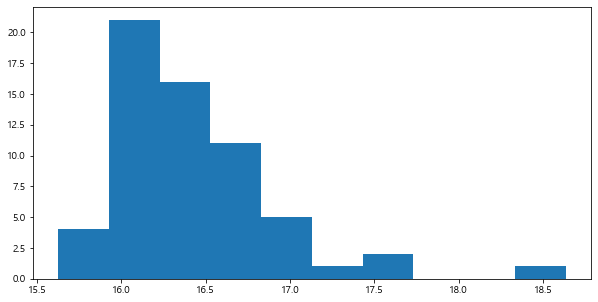

In [14]:
# BBC의 histogram

plt.figure(figsize=(10, 5))
plt.hist(BBC['Row_mean'],histtype='bar')

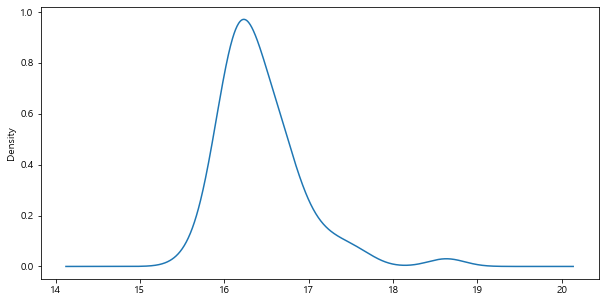

In [15]:
# BBC의 커널밀도추정(KDE, Kernel Density Estimation)

plt.figure(figsize=(10, 5)) 

BBC['Row_mean'].plot.kde()
plt.show()

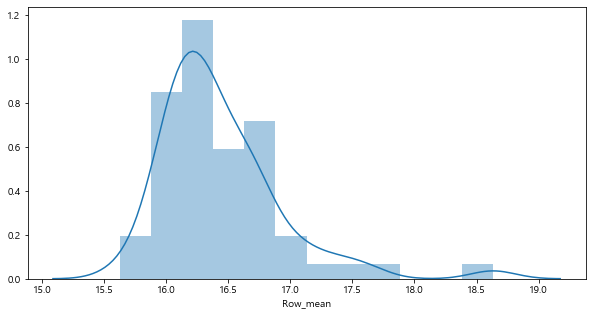

In [16]:
# 'Row_mean'의 distplot

plt.figure(figsize=(10, 5))

sns.distplot(BBC['Row_mean'],kde=True)

15.086078102220036

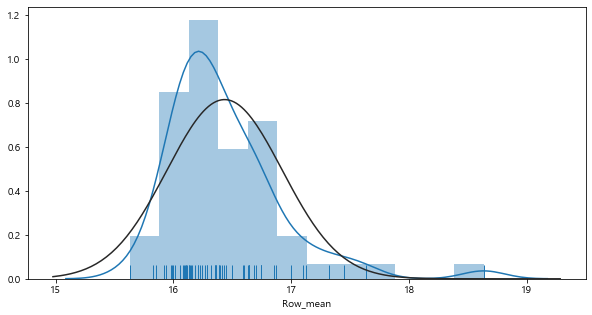

In [17]:
plt.figure(figsize=(10, 5))
sns.distplot(BBC['Row_mean'],kde=True,fit = stats.norm,rug=True).get_lines()[0].get_data()[0].min()

In [18]:
# 'Row_mean'의 kde와 해당 범위의 정규분포를 비교하는 함수
def KDE_NORM_LOC_PPL(Series, KDELoc, NORMLoc):
    plt.figure(figsize=(10, 5))
    DISTPLOT = sns.distplot(Series,kde=True,fit = stats.norm,rug=True)

    plt.annotate('KDE',
                xy =(DISTPLOT.get_lines()[0].get_data()[0][KDELoc],DISTPLOT.get_lines()[0].get_data()[1][KDELoc]),
                xytext=(DISTPLOT.get_lines()[0].get_data()[0].min(),0.10),
                arrowprops={'facecolor' : 'red'},
                ha = 'center')
    plt.annotate('NORM',
                xy =(DISTPLOT.get_lines()[1].get_data()[0][NORMLoc],DISTPLOT.get_lines()[1].get_data()[1][NORMLoc]),
                xytext=(DISTPLOT.get_lines()[0].get_data()[0].max(),0.10),
                arrowprops={'facecolor' : 'yellow'},
                ha = 'center')
    plt.show()
    print("KDE : "+str(KDELoc)+" / NORM : "+str(NORMLoc))
    print("-KDE-")
    print("X : "+str(DISTPLOT.get_lines()[0].get_data()[0][KDELoc]))
    print("Y : "+str(DISTPLOT.get_lines()[0].get_data()[1][KDELoc]))
    print("-NORM-")
    print("X : "+str(DISTPLOT.get_lines()[1].get_data()[0][NORMLoc]))
    print("Y : "+str(DISTPLOT.get_lines()[1].get_data()[1][NORMLoc]))
    print("\n")
    if DISTPLOT.get_lines()[0].get_data()[1][KDELoc] > DISTPLOT.get_lines()[1].get_data()[1][NORMLoc]:
        print("KDE가 높음")
    elif DISTPLOT.get_lines()[0].get_data()[1][KDELoc] < DISTPLOT.get_lines()[1].get_data()[1][NORMLoc]:
        print("NORM이 높음")
    elif DISTPLOT.get_lines()[0].get_data()[1][KDELoc] == DISTPLOT.get_lines()[1].get_data()[1][NORMLoc]:
        print("같음")

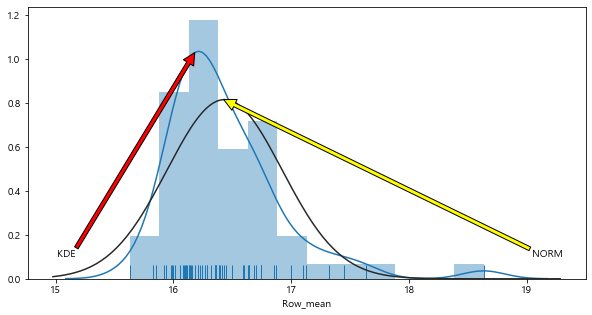

KDE : 34 / NORM : 67
-KDE-
X : 16.18066025314709
Y : 1.0289988663840839
-NORM-
X : 16.42680876275811
Y : 0.8152086974763385


KDE가 높음


In [19]:
KDE_NORM_LOC_PPL(BBC['Row_mean'],34,67)

## 파라미터를 변경하며 측정

# 정규분포에 가까운 분포
# 중심극한정리 : 동일한 확률분포를 가진 독립 확률 변수 n개의 평균의 분포는 n이 적당히 크다면 정규분포에 가까워진다는 정리
# [출처] - https://m.blog.naver.com/PostView.nhn?blogId=parksehoon1971&logNo=221585313064&proxyReferer=https:%2F%2Fwww.google.com%2F


---
### boxplot

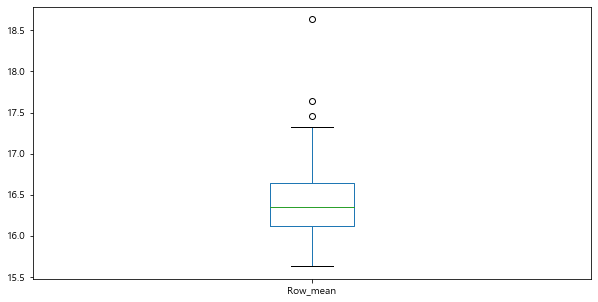

In [20]:
# 'Row_mean'의 boxplot
plt.figure(figsize=(10, 5))
BBC['Row_mean'].plot(kind='box')

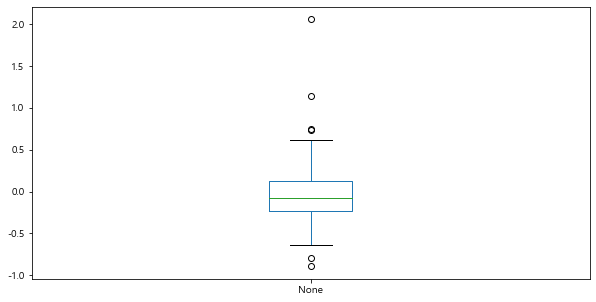

In [21]:
# 'Row_mean' - 'avg_5' 의 boxplot
plt.figure(figsize=(10, 5))
(BBC['Row_mean'] - BBC['avg_5']).plot(kind='box')

# 이상치(방영일)의 발견

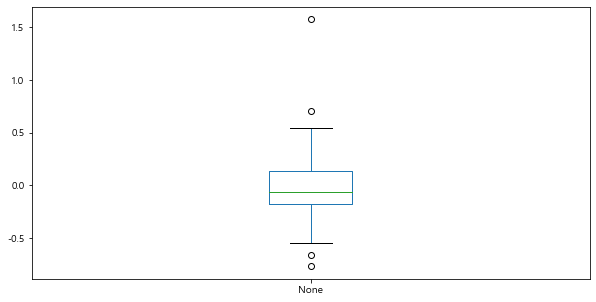

In [22]:
# 'Row_mean' - 'avg_10' 의 boxplot
plt.figure(figsize=(10, 5))
(BBC['Row_mean'] - BBC['avg_10']).plot(kind='box')

---
## 표준편차((2시그마, 3시그마)와의 비교)
* 2시그마의 법칙  
임의의 표본이 (평균 + (2 \* 표준편차))와 (평균 - (2 \* 표준편차)) 사이에 해당할 확률은 95%이다.

In [23]:
BBC['Row_mean'].describe()

count    61.000000
mean     16.434104
std       0.493381
min      15.626873
25%      16.118279
50%      16.351005
75%      16.640788
max      18.633869
Name: Row_mean, dtype: float64

In [24]:
max_2sigma = BBC['Row_mean'].mean() + (2*BBC['Row_mean'].std())
min_2sigma = BBC['Row_mean'].mean() - (2*BBC['Row_mean'].std())

In [25]:
# 'Row_mean' 중 2sigma를 넘지 않는 비율
(BBC['Row_mean'] > max_2sigma).value_counts()

# 99.94%

False    58
True      3
Name: Row_mean, dtype: int64

In [26]:
100 - (3/58)

99.94827586206897

In [27]:
max_3sigma = BBC['Row_mean'].mean() + (3*BBC['Row_mean'].std())

In [28]:
# 'Row_mean' 중 3sigma를 넘지 않는 비율
(BBC['Row_mean'] > max_3sigma).value_counts()

# True 1 : Row_mean의 최댓값 : 방영일

False    60
True      1
Name: Row_mean, dtype: int64

In [29]:
# 'Row_mean' 중 -2sigma를 넘는 비율
(BBC['Row_mean'] < min_2sigma).value_counts()

# 100%

False    61
Name: Row_mean, dtype: int64

---
## 이동평균선(이격도)과의 차이

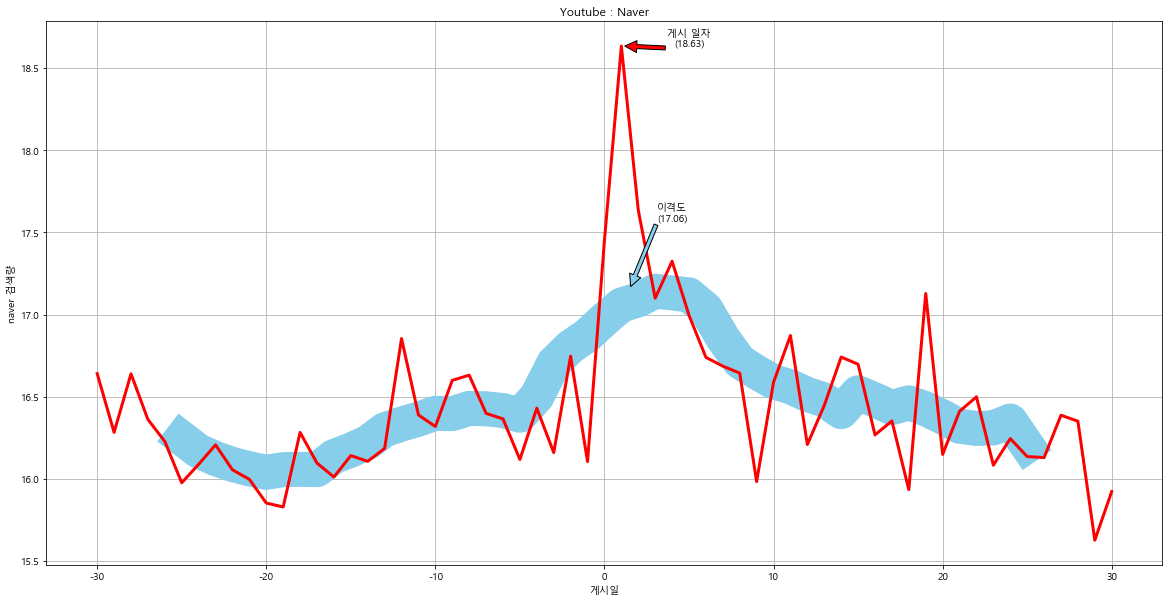

In [94]:
# avg_10


# plot 출력
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)


plt.plot(BBC['Row_mean'])
ax.plot(BBC.index, BBC['avg_10'],linewidth=35,color='skyblue')
ax.plot(BBC.index, BBC['Row_mean'],linewidth=3,color='red')
plt.xlabel('게시일')
plt.ylabel('naver 검색량')
plt.title('Youtube : Naver')
# annot : 'Row_mean'
plt.annotate('게시 일자'+'\n'+'('+str('%.2f' % BBC['Row_mean'][1])+')',
            xy = (1+0.2, BBC['Row_mean'][1]),
            xytext = (0+5, BBC['Row_mean'][1]),
            ha = 'center',
            arrowprops={'facecolor' : 'red'}
            )
# annot : 'avg_10'
plt.annotate('이격도'+'\n'+'('+str('%.2f' % BBC['avg_10'][1])+')',
            xy = (1+0.55, BBC['avg_10'][0]+0.2),
            xytext = (0+4, BBC['avg_10'][0]+0.6),
            ha = 'center',
            arrowprops={'facecolor' : 'skyblue'}
            )
plt.grid(True)

plt.show()

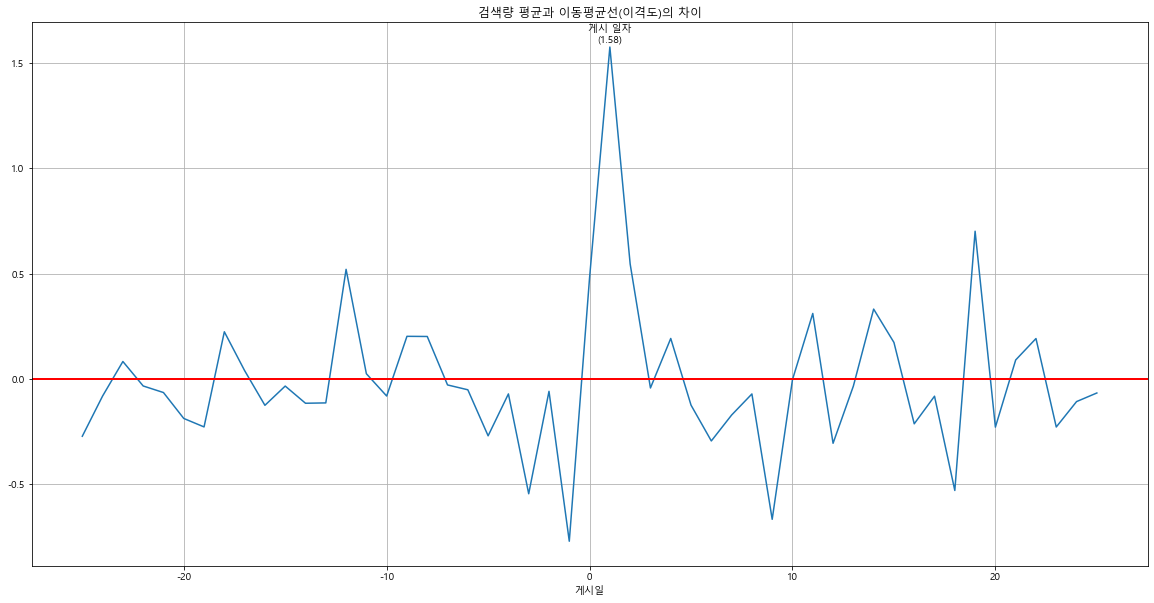

In [104]:
# avg_10


# 평균과 이동평균선의 차이
M_A = BBC['Row_mean'] - BBC['avg_10']

plt.figure(figsize=(20,10))
plt.title('검색량 평균과 이동평균선(이격도)의 차이')

plt.plot(BBC['Row_mean'] - BBC['avg_10'])
plt.axhline(y=0, color='r', linewidth=2)

plt.xlabel('게시일')
plt.annotate('게시 일자'+'\n'+'('+str('%.2f' % M_A[1])+')',
            xy =(1 ,M_A[1]+0.025),
            ha = 'center')

plt.grid(True)

plt.show()

In [32]:
print(BBC['Row_mean'][0])
print(BBC['avg_10'][0])
print(M_A.max())
print(M_A.mean())

17.452139789059697
16.970636504111543
1.5754774490525314
-0.007375331573744357


---
# 결론 ( 브랜드명 & 품목 )
    
분석결과, 뷰티 상품의 유튜브 영상게시는 Naver의 검색량에 영향을 주었다.   
  
영향 측정은 간접광고 방영 30일전, 당일, 30일후로 나누어  
모든 품목들의 해당일자의 '평균치(['Row_mean'])'를 만들었고,  
'평균치'가 유의미한지 추세를 제공하는지 알아보기 위해 '이동평균선(['avg_10'])'을 사용하였다.  
이동평균선의 '이격도'는 '평균치'의 10일(x-5,x+5)간의 평균으로 제작하였다.  
  
 단위기간 평균치와 추세선의 차(['Row_mean']-['avg_10'])에서  
게시 1일 후에 가장 높은 값(1.575)을 보였다.(평균:-0.007)  
 당일에 가장 높은 값(1.575)을 보였다.(평균:-0.007)  
그리고 해당 값은 3sigma를 넘는 값으로,

위기간 평균치와 추세선의 차(['Row_mean']-['avg_10'])에서  
게시 1일 후에 가장 높은 값(1.575)을 보였다.(평균:-0.007)  
 당일에 가장 높은 값(1.575)을 보였다.(평균:-0.007)  
그리고 해당 값은 3sigma를 넘는 값으로,

'뷰티 상품의 영상(유튜브)게시'가  
'Naver검색량(브랜드명+품목)'에 큰 영향이 있었음을 알 수 있다.


---
---

---
---

---
---
# Beauty Brand Product(name) 
'브랜드 + 상품명'으로 구성된 Dataframe

In [33]:
BBP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Columns: 3371 entries, Unnamed: 0 to 로레알 프로페셔널 파리 테크니아트 스티프 왁스_1
dtypes: float64(3370), int64(1)
memory usage: 1.6 MB


In [34]:
sum(BBP.isnull().sum())

0

---
### 분석을 위한 데이터 준비

In [35]:
# 해당 단위에서 사용되지 않는 조회수row(62번) 잠시 제거

BBP = BBP[:61]
BBP.tail(2)

,Unnamed: 0,코스알엑스 풀핏 프로폴리스 시너지 토너_0,코스알엑스 풀핏 프로폴리스 시너지 토너_1,코스알엑스 풀핏 프로폴리스 시너지 토너_2,더랩 바이 블랑두 올리고 히알루론산 멀티 포뮬라 패드_0,더랩 바이 블랑두 올리고 히알루론산 멀티 포뮬라 패드_1,더랩 바이 블랑두 올리고 히알루론산 멀티 포뮬라 패드_2,프레쥬 프로 모이스처 크리미 토너_0,프레쥬 프로 모이스처 크리미 토너_1,프레쥬 프로 모이스처 크리미 토너_2,...,러쉬 칼라마주_0,러쉬 칼라마주_1,스웨거 헤어 스릴러 멘톨 샴푸_0,스웨거 헤어 스릴러 멘톨 샴푸_1,스웨거 헤어 스터너 왁스 크림 타입 크리미 소프트 _0,스웨거 헤어 스터너 왁스 크림 타입 크리미 소프트 _1,그라펜 해수 포마드_0,그라펜 해수 포마드_1,로레알 프로페셔널 파리 테크니아트 스티프 왁스_0,로레알 프로페셔널 파리 테크니아트 스티프 왁스_1
59,59,26.31578,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,37.77777,46.66666,0.0,0.0
60,60,36.84210,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,46.66666,43.33333,0.0,0.0


In [36]:
# row별(3372개) 평균 컬럼 추가

Row_mean = []
for i in range(0,len(BBP.index)):
    Row_mean.append(BBP.iloc[i].mean())
Row_mean = pd.DataFrame(Row_mean)
BBP['Row_mean'] = Row_mean

BBP.columns


Index(['Unnamed: 0', '코스알엑스 풀핏 프로폴리스 시너지 토너_0', '코스알엑스 풀핏 프로폴리스 시너지 토너_1',
       '코스알엑스 풀핏 프로폴리스 시너지 토너_2', '더랩 바이 블랑두 올리고 히알루론산  멀티 포뮬라 패드_0',
       '더랩 바이 블랑두 올리고 히알루론산  멀티 포뮬라 패드_1', '더랩 바이 블랑두 올리고 히알루론산  멀티 포뮬라 패드_2',
       '프레쥬 프로 모이스처 크리미 토너_0', '프레쥬 프로 모이스처 크리미 토너_1', '프레쥬 프로 모이스처 크리미 토너_2',
       ...
       '러쉬 칼라마주_1', '스웨거 헤어 스릴러 멘톨 샴푸_0', '스웨거 헤어 스릴러 멘톨 샴푸_1',
       '스웨거 헤어 스터너 왁스 크림 타입  크리미 소프트 _0', '스웨거 헤어 스터너 왁스 크림 타입  크리미 소프트 _1',
       '그라펜 해수 포마드_0', '그라펜 해수 포마드_1', '로레알 프로페셔널 파리 테크니아트 스티프 왁스_0',
       '로레알 프로페셔널 파리 테크니아트 스티프 왁스_1', 'Row_mean'],
      dtype='object', length=3372)

In [37]:
# 이동평균선 제작('avg_10')
# ['Row_mean']의 10일간격(해당일 전후5일) 평균치

avg_10 = []
for i in range(0,len(BBP['Row_mean'])):
    avg_10.append(BBP['Row_mean'][i-5:i+5].mean())
avg_10 = pd.DataFrame(avg_10)
avg_10.head(10)
BBP['avg_10'] = avg_10
BBP['avg_10'][56:61] = np.nan

BBP.columns

Index(['Unnamed: 0', '코스알엑스 풀핏 프로폴리스 시너지 토너_0', '코스알엑스 풀핏 프로폴리스 시너지 토너_1',
       '코스알엑스 풀핏 프로폴리스 시너지 토너_2', '더랩 바이 블랑두 올리고 히알루론산  멀티 포뮬라 패드_0',
       '더랩 바이 블랑두 올리고 히알루론산  멀티 포뮬라 패드_1', '더랩 바이 블랑두 올리고 히알루론산  멀티 포뮬라 패드_2',
       '프레쥬 프로 모이스처 크리미 토너_0', '프레쥬 프로 모이스처 크리미 토너_1', '프레쥬 프로 모이스처 크리미 토너_2',
       ...
       '스웨거 헤어 스릴러 멘톨 샴푸_0', '스웨거 헤어 스릴러 멘톨 샴푸_1',
       '스웨거 헤어 스터너 왁스 크림 타입  크리미 소프트 _0', '스웨거 헤어 스터너 왁스 크림 타입  크리미 소프트 _1',
       '그라펜 해수 포마드_0', '그라펜 해수 포마드_1', '로레알 프로페셔널 파리 테크니아트 스티프 왁스_0',
       '로레알 프로페셔널 파리 테크니아트 스티프 왁스_1', 'Row_mean', 'avg_10'],
      dtype='object', length=3373)

In [38]:
# 방영일자(0~60)을 (-30~0~30) 으로 변경
BBP.index = np.arange(-30,31)
BBP.head()


,Unnamed: 0,코스알엑스 풀핏 프로폴리스 시너지 토너_0,코스알엑스 풀핏 프로폴리스 시너지 토너_1,코스알엑스 풀핏 프로폴리스 시너지 토너_2,더랩 바이 블랑두 올리고 히알루론산 멀티 포뮬라 패드_0,더랩 바이 블랑두 올리고 히알루론산 멀티 포뮬라 패드_1,더랩 바이 블랑두 올리고 히알루론산 멀티 포뮬라 패드_2,프레쥬 프로 모이스처 크리미 토너_0,프레쥬 프로 모이스처 크리미 토너_1,프레쥬 프로 모이스처 크리미 토너_2,...,스웨거 헤어 스릴러 멘톨 샴푸_0,스웨거 헤어 스릴러 멘톨 샴푸_1,스웨거 헤어 스터너 왁스 크림 타입 크리미 소프트 _0,스웨거 헤어 스터너 왁스 크림 타입 크리미 소프트 _1,그라펜 해수 포마드_0,그라펜 해수 포마드_1,로레알 프로페셔널 파리 테크니아트 스티프 왁스_0,로레알 프로페셔널 파리 테크니아트 스티프 왁스_1,Row_mean,avg_10
-30,0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,61.11111,62.22222,0.0,0.0,8.989458,NaN
-29,1,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,64.44444,47.77777,0.0,0.0,9.287365,NaN
-28,2,26.31578,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,67.77777,51.11111,0.0,0.0,8.985804,NaN
-27,3,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,65.55555,58.88888,0.0,0.0,8.711322,NaN
-26,4,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,57.77777,54.44444,0.0,0.0,8.566492,NaN


---
## 데이터 분포 확인

'Row_mean'의 정규분포를 확인.  
중심극한정리에 의해, 'Row_mean'은 정규분포를 가질 것으로 예측

---
### 분포 검증 (히스토그램, 커널밀도추정, 정규분포)

(array([ 7., 19.,  9., 12.,  6.,  4.,  2.,  1.,  0.,  1.]),
 array([ 8.54899707,  8.84309036,  9.13718365,  9.43127695,  9.72537024,
        10.01946353, 10.31355682, 10.60765011, 10.9017434 , 11.19583669,
        11.48992998]),
 <a list of 10 Patch objects>)

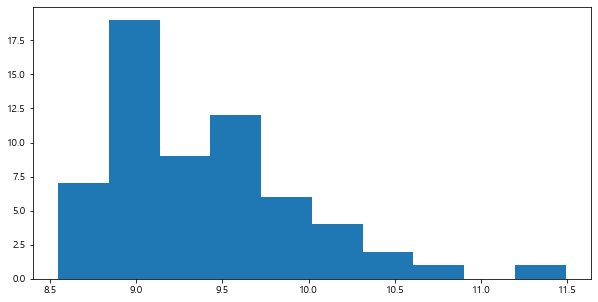

In [39]:
# BBP의 histogram

plt.figure(figsize=(10, 5))
plt.hist(BBP['Row_mean'],histtype='bar')

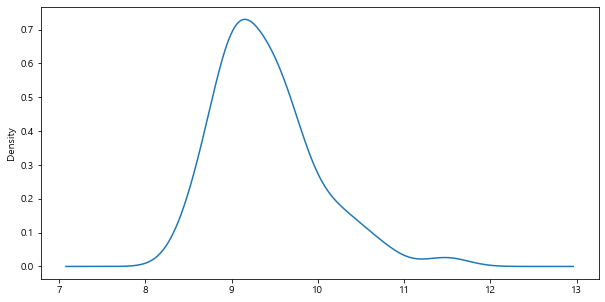

In [40]:
# BBP의 커널밀도추정(KDE, Kernel Density Estimation)

plt.figure(figsize=(10, 5)) 

BBP['Row_mean'].plot.kde()
plt.show()

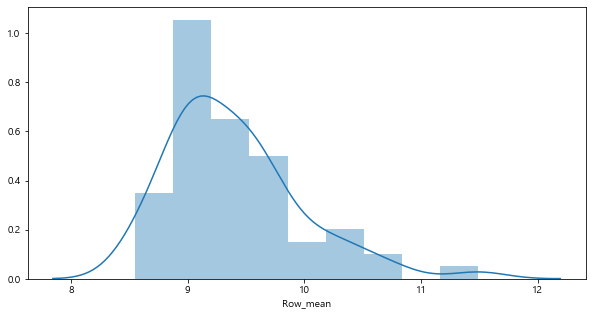

In [41]:
# 'Row_mean'의 distplot

plt.figure(figsize=(10, 5))

sns.distplot(BBP['Row_mean'],kde=True)

7.846267298407044

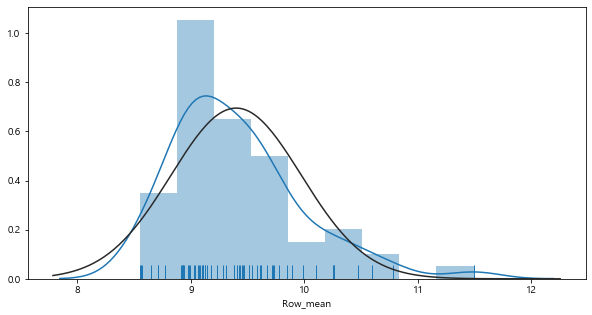

In [42]:
plt.figure(figsize=(10, 5))
sns.distplot(BBP['Row_mean'],kde=True,fit = stats.norm,rug=True).get_lines()[0].get_data()[0].min()

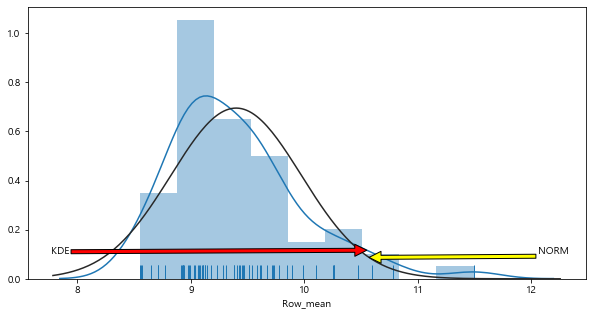

KDE : 79 / NORM : 124
-KDE-
X : 10.549928748330869
Y : 0.11622114463244661
-NORM-
X : 10.569484026015992
Y : 0.08702090558177548


KDE가 높음


In [43]:
KDE_NORM_LOC_PPL(BBP['Row_mean'],79,124)
# 파라미터를 변경하며 측정

# 정규분포에 가까운 분포

# 중심극한정리 : 동일한 확률분포를 가진 독립 확률 변수 n개의 평균의 분포는 n이 적당히 크다면 정규분포에 가까워진다는 정리
# [출처] - https://m.blog.naver.com/PostView.nhn?blogId=parksehoon1971&logNo=221585313064&proxyReferer=https:%2F%2Fwww.google.com%2F


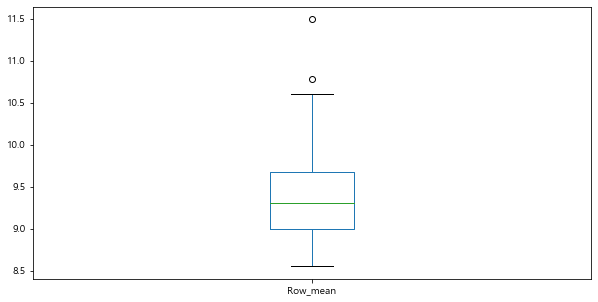

In [44]:
# 'Row_mean'의 boxplot
plt.figure(figsize=(10, 5))
BBP['Row_mean'].plot(kind='box')

---
## 표준편차((2시그마, 3시그마)와의 비교)
* 2시그마의 법칙  
임의의 표본이 (평균 + (2 \* 표준편차))와 (평균 - (2 \* 표준편차)) 사이에 해당할 확률은 95%이다.

In [45]:
BBP['Row_mean'].describe()

count    61.000000
mean      9.399097
std       0.578941
min       8.548997
25%       8.989458
50%       9.305893
75%       9.668425
max      11.489930
Name: Row_mean, dtype: float64

In [46]:
max_2sigma = BBP['Row_mean'].mean() + (2*BBP['Row_mean'].std())
min_2sigma = BBP['Row_mean'].mean() - (2*BBP['Row_mean'].std())

In [47]:
# 'Row_mean' 중 2sigma를 넘지 않는 비율
(BBP['Row_mean'] > max_2sigma).value_counts()

# 99.94%

False    58
True      3
Name: Row_mean, dtype: int64

In [48]:
# 결과

100 - 3/58

99.94827586206897

In [49]:
max_3sigma = BBP['Row_mean'].mean() + (3*BBP['Row_mean'].std())

In [50]:
# 'Row_mean' 중 3sigma를 넘지 않는 비율
(BBP['Row_mean'] > max_3sigma).value_counts()

# True 1 : Row_mean의 최댓값 : 게시일

False    60
True      1
Name: Row_mean, dtype: int64

In [51]:
# 'Row_mean' 중 -2sigma를 넘는 비율
(BBP['Row_mean'] < min_2sigma).value_counts()

# 100%

False    61
Name: Row_mean, dtype: int64

---
## 이동평균선(이격도)과의 차이

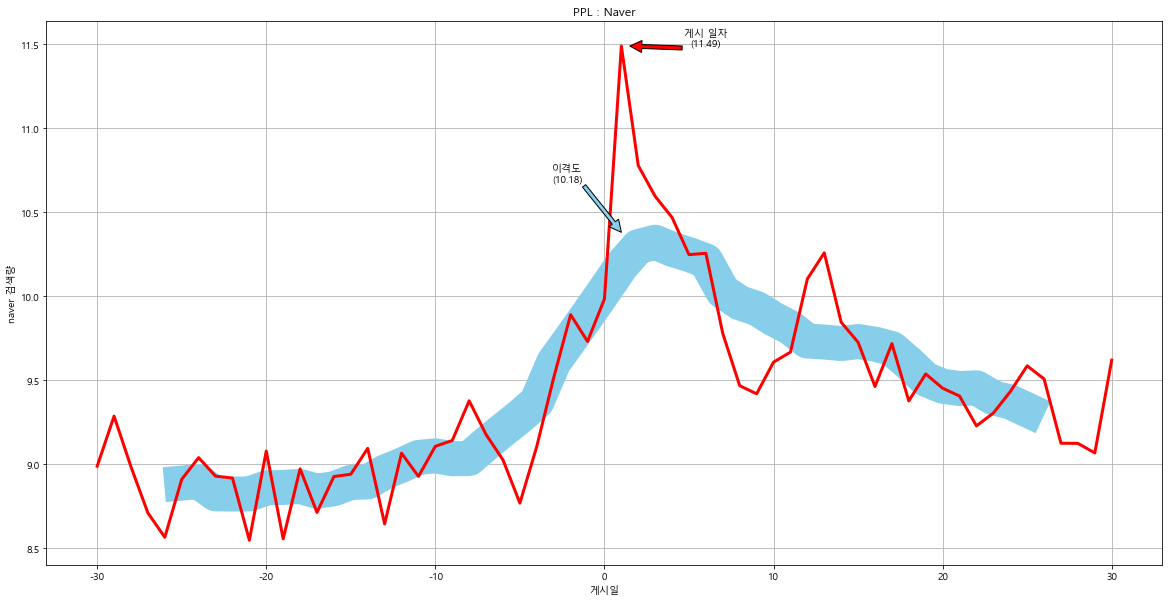

In [118]:
# avg_10


# plot 출력
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)


plt.plot(BBP['Row_mean'])
ax.plot(BBP.index, BBP['avg_10'],linewidth=35,color='skyblue')
ax.plot(BBP.index, BBP['Row_mean'],linewidth=3,color='red')
plt.xlabel('게시일')
plt.ylabel('naver 검색량')
plt.title('PPL : Naver')
# annot : 'Row_mean'
plt.annotate('게시 일자'+'\n'+'('+str('%.2f' % BBP['Row_mean'][1])+')',
            xy = (1+0.5, BBP['Row_mean'][1]),
            xytext = (1+5, BBP['Row_mean'][1]),
            ha = 'center',
            arrowprops={'facecolor' : 'red'}
            )
# annot : 'avg_10'
plt.annotate('이격도'+'\n'+'('+str('%.2f' % BBP['avg_10'][1])+')',
            xy = (1, BBP['avg_10'][1]+0.2),
            xytext = (1-3.2, BBP['avg_10'][1]+0.5),
            ha = 'center',
            arrowprops={'facecolor' : 'skyblue'}
            )
plt.grid(True)

plt.show()

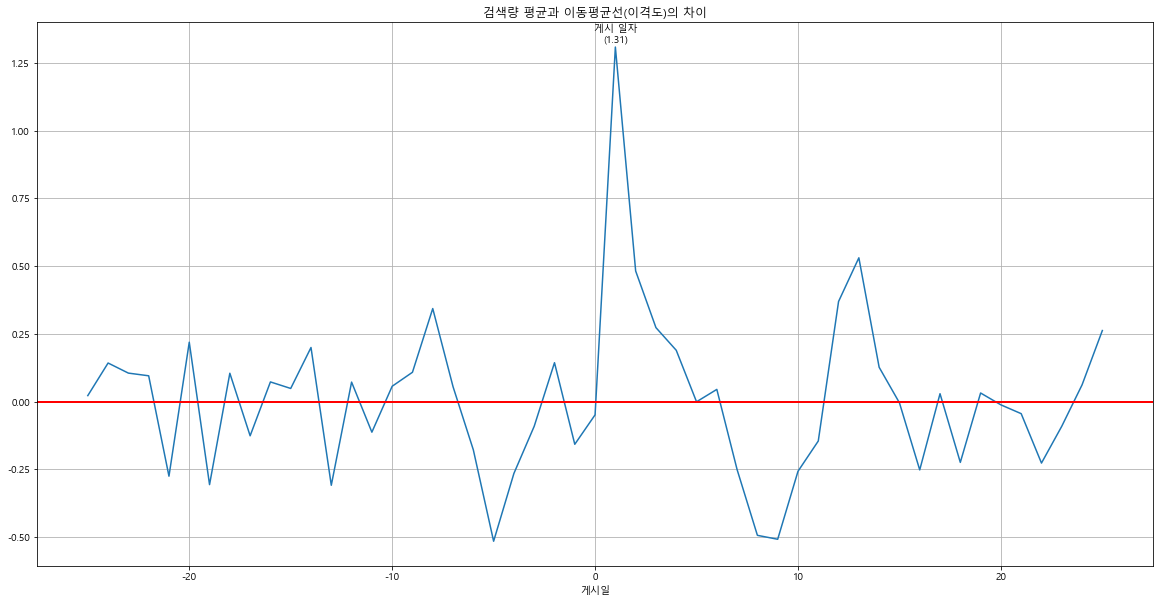

In [122]:
# avg_10


# 평균과 이동평균선의 차이
M_A = BBP['Row_mean'] - BBP['avg_10']

plt.figure(figsize=(20,10))
plt.title('검색량 평균과 이동평균선(이격도)의 차이')

plt.plot(BBP['Row_mean'] - BBP['avg_10'])
plt.axhline(y=0, color='r', linewidth=2)

plt.xlabel('게시일')
plt.annotate('게시 일자'+'\n'+'('+str('%.2f' % M_A[1])+')',
            xy =(1, M_A[1]+0.02),
            ha = 'center')

plt.grid(True)

plt.show()

In [54]:
print(BBP['Row_mean'][0])
print(BBP['avg_10'][0])
print(M_A.max())
print(M_A.mean())

9.98482453871256
10.033638044793829
1.3084436618214141
0.011894576311212667


---
# 결론 ( 브랜드명 & 상품명 )
    
분석결과, 뷰티 상품의 유튜브 영상게시는 Naver의 검색량에 영향을 주었다.  
영향 측정은 간접광고 방영 30일전, 당일, 30일후로 나누어  
모든 품목들의 해당일자의 '평균치(['Row_mean'])'를 만들었고,  
'평균치'가 유의미한지 추세를 제공하는지 알아보기 위해 '이동평균선(['avg_10'])'을 사용하였다.  
이동평균선의 '이격도'는 '평균치'의 10일(x-5,x+5)간의 평균으로 제작하였다.  
  
단위기간 평균치와 추세선의 차(['Row_mean']-['avg_10'])에서  
게시 1일 후에 가장 높은 값(1.308)을 보였다.(평균:0.011)  
그리고 해당 값은 3sigma를 넘는 값으로,

 1일 후에 가장 높은 값(1.308)을 보였다.(평균:0.011)  
그리고 해당 값은 3sigma를 넘는 값으로,

'뷰티 상품의 영상(유튜브)게시'는  
'Naver검색량(브랜드명+상품명)'에 큰 영향이 있었음을 알 수 있다.


---
---

---
---
# Product(name)
'상품명'으로만 구성된 Dataframe

In [55]:
BP.head()

,Unnamed: 0,풀핏 프로폴리스 시너지 토너_0,풀핏 프로폴리스 시너지 토너_1,올리고 히알루론산 멀티 포뮬라 패드_0,올리고 히알루론산 멀티 포뮬라 패드_1,프로 모이스처 크리미 토너_0,프로 모이스처 크리미 토너_1,테르물레 클리어 패드_0,테르물레 클리어 패드_1,리페어레이션 에센스 토너_0,...,헤어 스릴러 멘톨 샴푸_2,헤어 스터너 왁스 크림 타입 크리미 소프트 _0,헤어 스터너 왁스 크림 타입 크리미 소프트 _1,헤어 스터너 왁스 크림 타입 크리미 소프트 _2,해수 포마드_0,해수 포마드_1,해수 포마드_2,테크니아트 스티프 왁스_0,테크니아트 스티프 왁스_1,테크니아트 스티프 왁스_2
0,0,0.0,0.0,0.0,0.0,55.55555,0.0,0.00000,0.00000,0.0,...,0.0,0.0,0.0,0.0,59.25925,44.44444,44.44444,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.00000,0.0,0.00000,83.33333,0.0,...,0.0,0.0,0.0,0.0,62.96296,77.77777,77.77777,0.0,0.0,0.0
2,2,50.0,0.0,0.0,0.0,0.00000,0.0,54.54545,0.00000,0.0,...,0.0,0.0,0.0,0.0,22.22222,29.62962,29.62962,0.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0,0.00000,0.0,54.54545,0.00000,0.0,...,0.0,0.0,0.0,0.0,22.22222,40.74074,40.74074,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.00000,0.0,72.72727,100.00000,0.0,...,0.0,0.0,0.0,0.0,22.22222,55.55555,55.55555,0.0,0.0,0.0


In [56]:
BP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Columns: 3610 entries, Unnamed: 0 to 테크니아트 스티프 왁스_2
dtypes: float64(3609), int64(1)
memory usage: 1.7 MB


---
### 분석을 위한 데이터 준비

In [57]:
# 해당 단위에서 사용되지 않는 조회수row(62번) 잠시 제거

BP = BP[:61]
BP.tail(2)

,Unnamed: 0,풀핏 프로폴리스 시너지 토너_0,풀핏 프로폴리스 시너지 토너_1,올리고 히알루론산 멀티 포뮬라 패드_0,올리고 히알루론산 멀티 포뮬라 패드_1,프로 모이스처 크리미 토너_0,프로 모이스처 크리미 토너_1,테르물레 클리어 패드_0,테르물레 클리어 패드_1,리페어레이션 에센스 토너_0,...,헤어 스릴러 멘톨 샴푸_2,헤어 스터너 왁스 크림 타입 크리미 소프트 _0,헤어 스터너 왁스 크림 타입 크리미 소프트 _1,헤어 스터너 왁스 크림 타입 크리미 소프트 _2,해수 포마드_0,해수 포마드_1,해수 포마드_2,테크니아트 스티프 왁스_0,테크니아트 스티프 왁스_1,테크니아트 스티프 왁스_2
59,59,35.71428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,40.74074,29.62962,29.62962,0.0,0.0,0.0
60,60,0.00000,62.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,18.51851,22.22222,22.22222,0.0,0.0,0.0


In [58]:
sum(BP.isnull().sum())

0

In [59]:
# row별(3612개) 평균 컬럼 추가

Row_mean = []
for i in range(0,len(BP.index)):
    Row_mean.append(BP.iloc[i].mean())
Row_mean = pd.DataFrame(Row_mean)
BP['Row_mean'] = Row_mean
BP.columns


Index(['Unnamed: 0', '풀핏 프로폴리스 시너지 토너_0', '풀핏 프로폴리스 시너지 토너_1',
       '올리고 히알루론산  멀티 포뮬라 패드_0', '올리고 히알루론산  멀티 포뮬라 패드_1', '프로 모이스처 크리미 토너_0',
       '프로 모이스처 크리미 토너_1', '테르물레 클리어 패드_0', '테르물레 클리어 패드_1', '리페어레이션 에센스 토너_0',
       ...
       '헤어 스터너 왁스 크림 타입  크리미 소프트 _0', '헤어 스터너 왁스 크림 타입  크리미 소프트 _1',
       '헤어 스터너 왁스 크림 타입  크리미 소프트 _2', '해수 포마드_0', '해수 포마드_1', '해수 포마드_2',
       '테크니아트 스티프 왁스_0', '테크니아트 스티프 왁스_1', '테크니아트 스티프 왁스_2', 'Row_mean'],
      dtype='object', length=3611)

In [60]:
# 이동평균선 제작('avg_10')
# ['Row_mean']의 10일간격(해당일 전후5일) 평균치

avg_10 = []
for i in range(0,len(BP['Row_mean'])):
    avg_10.append(BP['Row_mean'][i-5:i+5].mean())
avg_10 = pd.DataFrame(avg_10)
avg_10.head(10)
BP['avg_10'] = avg_10
BP['avg_10'][56:61] = np.nan

BP.columns

Index(['Unnamed: 0', '풀핏 프로폴리스 시너지 토너_0', '풀핏 프로폴리스 시너지 토너_1',
       '올리고 히알루론산  멀티 포뮬라 패드_0', '올리고 히알루론산  멀티 포뮬라 패드_1', '프로 모이스처 크리미 토너_0',
       '프로 모이스처 크리미 토너_1', '테르물레 클리어 패드_0', '테르물레 클리어 패드_1', '리페어레이션 에센스 토너_0',
       ...
       '헤어 스터너 왁스 크림 타입  크리미 소프트 _1', '헤어 스터너 왁스 크림 타입  크리미 소프트 _2',
       '해수 포마드_0', '해수 포마드_1', '해수 포마드_2', '테크니아트 스티프 왁스_0', '테크니아트 스티프 왁스_1',
       '테크니아트 스티프 왁스_2', 'Row_mean', 'avg_10'],
      dtype='object', length=3612)

In [61]:
# 방영일자(0~60)을 (-30~0~30) 으로 변경
BP.index = np.arange(-30,31)
BP.head()

,Unnamed: 0,풀핏 프로폴리스 시너지 토너_0,풀핏 프로폴리스 시너지 토너_1,올리고 히알루론산 멀티 포뮬라 패드_0,올리고 히알루론산 멀티 포뮬라 패드_1,프로 모이스처 크리미 토너_0,프로 모이스처 크리미 토너_1,테르물레 클리어 패드_0,테르물레 클리어 패드_1,리페어레이션 에센스 토너_0,...,헤어 스터너 왁스 크림 타입 크리미 소프트 _1,헤어 스터너 왁스 크림 타입 크리미 소프트 _2,해수 포마드_0,해수 포마드_1,해수 포마드_2,테크니아트 스티프 왁스_0,테크니아트 스티프 왁스_1,테크니아트 스티프 왁스_2,Row_mean,avg_10
-30,0,0.0,0.0,0.0,0.0,55.55555,0.0,0.00000,0.00000,0.0,...,0.0,0.0,59.25925,44.44444,44.44444,0.0,0.0,0.0,9.052983,NaN
-29,1,0.0,0.0,0.0,0.0,0.00000,0.0,0.00000,83.33333,0.0,...,0.0,0.0,62.96296,77.77777,77.77777,0.0,0.0,0.0,9.150435,NaN
-28,2,50.0,0.0,0.0,0.0,0.00000,0.0,54.54545,0.00000,0.0,...,0.0,0.0,22.22222,29.62962,29.62962,0.0,0.0,0.0,9.034815,NaN
-27,3,0.0,0.0,0.0,0.0,0.00000,0.0,54.54545,0.00000,0.0,...,0.0,0.0,22.22222,40.74074,40.74074,0.0,0.0,0.0,8.789628,NaN
-26,4,0.0,0.0,0.0,0.0,0.00000,0.0,72.72727,100.00000,0.0,...,0.0,0.0,22.22222,55.55555,55.55555,0.0,0.0,0.0,9.073069,NaN


---
### 분포 검증 (히스토그램, 커널밀도추정, 정규분포)

(array([ 2.,  6.,  7., 11.,  9., 10.,  9.,  3.,  2.,  2.]),
 array([ 8.54633532,  8.7193033 ,  8.89227128,  9.06523926,  9.23820724,
         9.41117523,  9.58414321,  9.75711119,  9.93007917, 10.10304715,
        10.27601513]),
 <a list of 10 Patch objects>)

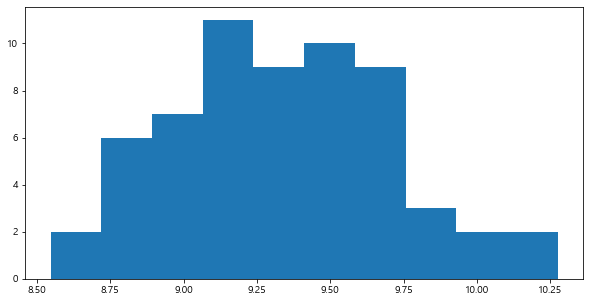

In [62]:
# AP의 histogram

plt.figure(figsize=(10, 5))
plt.hist(BP['Row_mean'],histtype='bar')

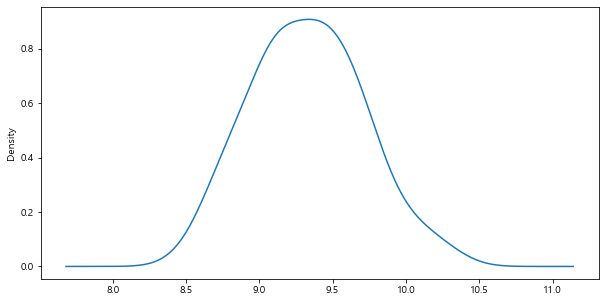

In [63]:
# AP의 커널밀도추정(KDE, Kernel Density Estimation)

plt.figure(figsize=(10, 5)) 

BP['Row_mean'].plot.kde()
plt.show()

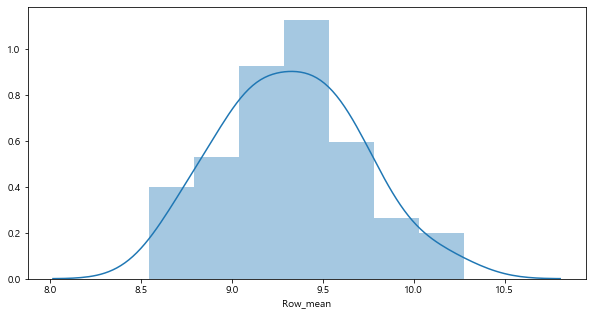

In [64]:
# 'Row_mean'의 distplot

plt.figure(figsize=(10, 5))

sns.distplot(BP['Row_mean'],kde=True)

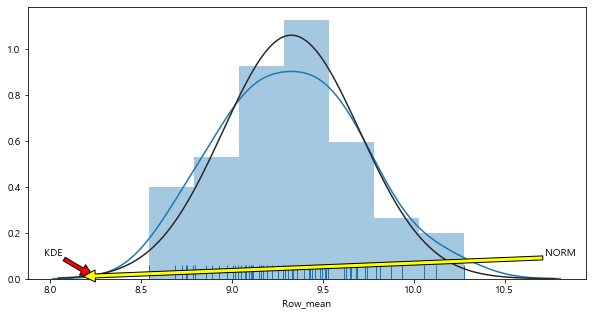

KDE : 10 / NORM : 10
-KDE-
X : 8.236748273462736
Y : 0.012132241019138679
-NORM-
X : 8.183839729552968
Y : 0.010375155570159575


KDE가 높음


In [65]:
KDE_NORM_LOC_PPL(BP['Row_mean'],10,10)

---
### boxplot

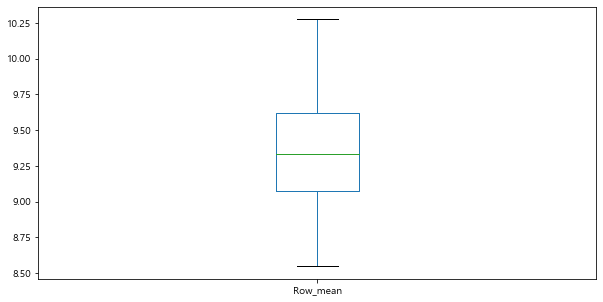

In [148]:
# 'Row_mean'의 boxplot
plt.figure(figsize=(10, 5))
BP['Row_mean'].plot(kind='box')

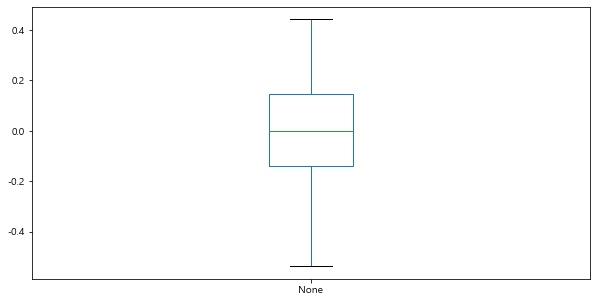

In [149]:
# 'Row_mean' - 'avg_10' 의 boxplot
plt.figure(figsize=(10, 5))
(BP['Row_mean'] - BP['avg_10']).plot(kind='box')

---
## 표준편차((2시그마, 3시그마)와의 비교)
* 2시그마의 법칙  
임의의 표본이 (평균 + (2 \* 표준편차))와 (평균 - (2 \* 표준편차)) 사이에 해당할 확률은 95%이다.

In [68]:
BP['Row_mean'].describe()

count    61.000000
mean      9.327281
std       0.378958
min       8.546335
25%       9.073069
50%       9.332269
75%       9.618569
max      10.276015
Name: Row_mean, dtype: float64

In [69]:
max_2sigma = BP['Row_mean'].mean() + (2*BP['Row_mean'].std())
min_2sigma = BP['Row_mean'].mean() - (2*BP['Row_mean'].std())

In [70]:
# 'Row_mean' 중 2sigma를 넘지 않는 비율
(BP['Row_mean'] > max_2sigma).value_counts()
# 100 - 1/60
# 99.98%

False    59
True      2
Name: Row_mean, dtype: int64

In [71]:
max_3sigma = BP['Row_mean'].mean() + (3*BP['Row_mean'].std())

In [72]:
(BP['Row_mean'] > max_3sigma).value_counts()

# 3 sigma를 넘는 값은 없음.

False    61
Name: Row_mean, dtype: int64

In [73]:
# 'Row_mean' 중 -2sigma를 넘는 비율
(BP['Row_mean'] < min_2sigma).value_counts()
# 100%

False    60
True      1
Name: Row_mean, dtype: int64

---
## 이동평균선(이격도)과의 차이

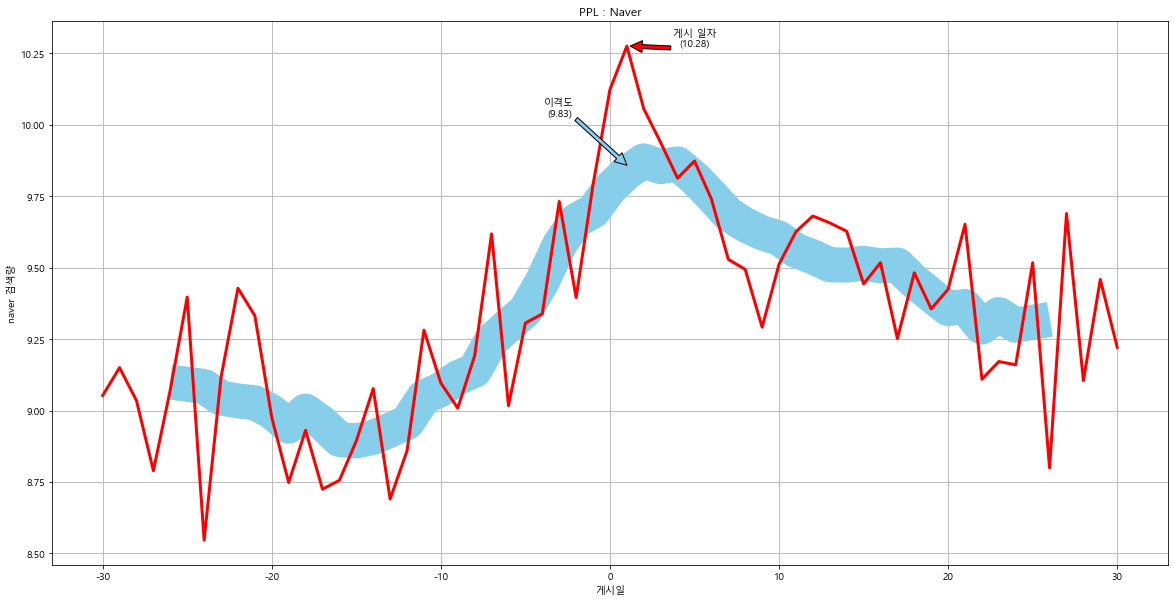

In [143]:
# avg_10


# plot 출력
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)


plt.plot(BP['Row_mean'])
ax.plot(BP.index, BP['avg_10'],linewidth=35,color='skyblue')
ax.plot(BP.index, BP['Row_mean'],linewidth=3,color='red')
plt.xlabel('게시일')
plt.ylabel('naver 검색량')
plt.title('PPL : Naver')
# annot : 'Row_mean'
plt.annotate('게시 일자'+'\n'+'('+str('%.2f' % BP['Row_mean'][1])+')',
            xy = (1+0.2, BP['Row_mean'][1]),
            xytext = (0+5, BP['Row_mean'][1]),
            ha = 'center',
            arrowprops={'facecolor' : 'red'}
            )
# annot : 'avg_10'
plt.annotate('이격도'+'\n'+'('+str('%.2f' % BP['avg_10'][1])+')',
            xy = (1, BP['avg_10'][1]+0.025),
            xytext = (1-4, BP['avg_10'][1]+0.2),
            ha = 'center',
            arrowprops={'facecolor' : 'skyblue'}
            )
plt.grid(True)

plt.show()

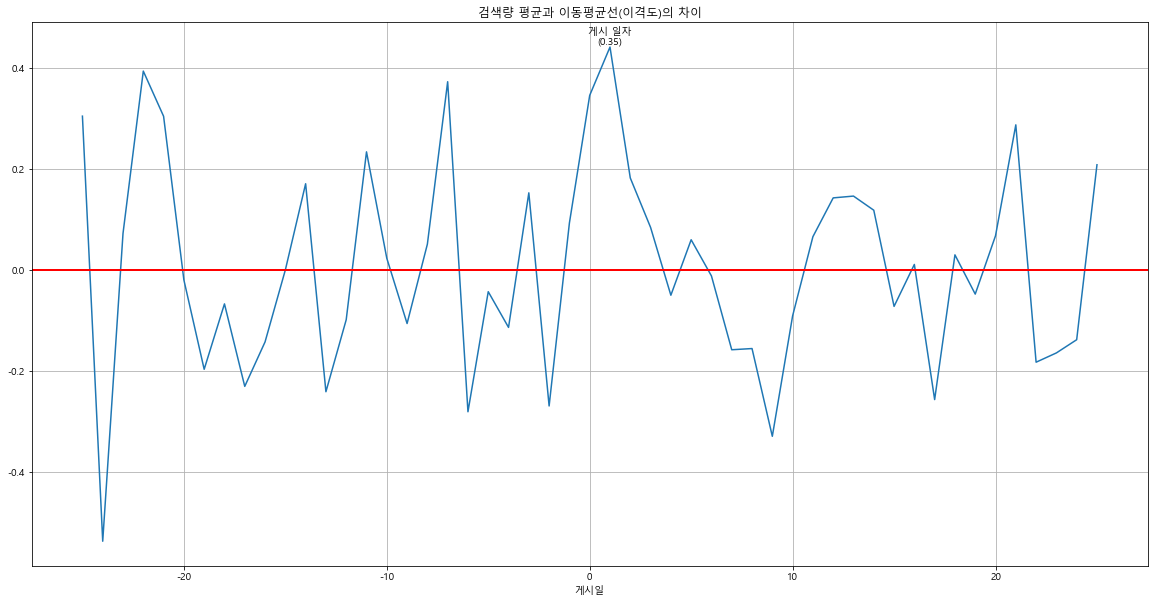

In [147]:
# 평균과 이격도의 차이
M_A = BP['Row_mean'] - BP['avg_10']

plt.figure(figsize=(20,10))
plt.title('검색량 평균과 이동평균선(이격도)의 차이')

plt.plot(BP['Row_mean'] - BP['avg_10'])
plt.axhline(y=0, color='r', linewidth=2)

plt.xlabel('게시일')
plt.annotate('게시 일자'+'\n'+'('+str('%.2f' % M_A[0])+')',
            xy =(1,M_A[1]+0.005),
            ha = 'center')

plt.grid(True)

plt.show()

In [76]:
print(BP['Row_mean'][0])
print(BP['avg_10'][0])
print(M_A.max())
print(M_A.mean())

10.123403326869797
9.7771241465374
0.4421767681440443
0.0070365887295639265


---
# 결론 ( 상품명 )
     
영향 측정은 간접광고 방영 30일전, 당일, 30일후로 나누어  
모든 품목들의 해당일자의 '평균치(['Row_mean'])'를 만들었고,  
'평균치'가 유의미한지 추세를 제공하는지 알아보기 위해 '이동평균선(['avg_10'])'을 사용하였다.  
이동평균선의 '이격도'는 '평균치'의 10일(x-5,x+5)간의 평균으로 제작하였다.  
  
단위기간 평균치와 추세선의 차(['Row_mean']-['avg_10'])에서  
게시 1일 후에 가장 높은 값(0.442)을 보였다.(평균:0.007)  
    
  
하지만  
'뷰티품목의 영상(유튜브)게시'가  
'Naver검색량(상품명)'에는 영향이 없음을 알 수 있었다.
   
'Naver검색량(상품명)' 분석에서 쓰인 요인(유튜브 영상게시)이외의 상승요인이 많았다.  
해당 분석의 다른 분석들과 비교해 보았을 때,  
여러 채널에 마케팅을 집행함에 있어  
'브랜드+상품명', '브랜드+품목' 보다는 '상품명'을 강조하여 마케팅을 진행한다는 것을 추측할 수 있다.
---
---

---
---
---
# 최종 결론

 본 분석에서는  
<U>' 뷰티 카테고리의 영상 게시(유튜브)가 네이버의 검색량에 미치는 영향 '</U>을 분석하였다.  
  
### 수집  
영향의 측정은 유튜브에 해당 '검색어'를 입력 후, 상위 2개의 영상에 대한 정보를 수집,  
그리고 그 정보를 '네이버 검색량 트렌드 API'에 사용하여 검색량의 전후 30일간의 추세를 수집하여 진행하였다.  
### 처리  
수집한 '뷰티 카테고리'정보에 대하여  
'브랜드+품목', '브랜드+상품명', '상품명' 세가지로 나누어 검색을 진행하였다.
  
  
### 분석  
* 분포적 특성 분석
    - 히스토그램
    - 커널밀도추정
    - 정규분포
    - 박스 플롯
    - 3 sigma 분석
* 시계열적 특성 분석
    - 이동평균선과의 비교

## 분석결과
- 3 sigma 분석  

|                 | 브랜드명+품목 | 브랜드명+상품명 | 상품명 |
|:---------------:|:-------------:|:---------------:|:------:|
| 게시물 > 3 sigma |       O       |        O        |    X   |
  
.  
.  
이동평균선에 대한 추세와 3 sigma분석을 통한 결과를 보았을 때.  
'브랜드명+품목'과 '브랜드명+상품명'의 '검색어'는  
영상 게시일자에 3 sigma를 넘는 검색량을 보이며  
유튜브 영상 게시가 검색량의 상승에 큰 영향을 주었다는 것을 알 수 있었다.  
  
'검색어' 중, '상품명'은 분석에서 쓰인 요인(유튜브 영상게시)이외의 상승요인이 많았는데,  
이는 해당 분석의 다른 분석들과 비교해 보았을 때  
여러 채널에 마케팅을 집행함에 있어  
'브랜드+상품명', '브랜드+품목' 보다는 '상품명'을 강조하여 마케팅을 진행한다는 것을 추측 할 수 있으며,  
상품에 대해 예상보다 많은 검색이 '전체 상품명'으로 이루어진다는 것을 알 수 있었다.


---
---
---

### 참고문헌

* 중심극한정리 - https://m.blog.naver.com/PostView.nhn?blogId=parksehoon1971&logNo=221585313064&proxyReferer=https:%2F%2Fwww.google.com%2F
* KDE, 커널밀도추정 - https://darkpgmr.tistory.com/147